In [1]:
import pandas as pd
import numpy as np

In [2]:
ipos_data = pd.read_csv("../../data/crunchbase/ipos.csv")
acqs_data = pd.read_csv("../../data/crunchbase/acquisitions.csv")
orgs_data = pd.read_csv("../../data/crunchbase/organizations.csv")
rnds_data = pd.read_csv('../../data/crunchbase/funding_rounds.csv')

In [29]:
ipos = ipos_data[['org_uuid', 'org_name', 'went_public_on', 'valuation_price_usd']].copy()
ipos.columns = ['org_uuid', 'name', 'exit_date', 'exit_value']

acqs = acqs_data[['acquiree_uuid', 'acquiree_name', 'acquired_on', 'price_usd']].copy()
acqs.columns = ['org_uuid', 'name',  'exit_date', 'exit_value']

bkpt = pd.DataFrame(orgs_data[['uuid', 'name', 'closed_on']].dropna()).copy()
bkpt.columns = ['org_uuid', 'name', 'exit_date']

In [31]:
ipos["exit_type"] = 1
acqs["exit_type"] = 2
bkpt["exit_type"] = 3
bkpt["exit_value"] = np.nan

In [32]:
exits = pd.concat([acqs, ipos, bkpt]).set_index("org_uuid")

In [33]:
print(f'Missing acquisitions: {100*acqs_data.price_usd.isna().sum() / acqs_data.price_usd.size:.2f}%')
print(f'Missing IPOs: {100*ipos_data.valuation_price_usd.isna().sum() / ipos_data.valuation_price_usd.size:.2f}%')

Missing acquisitions: 82.93%
Missing IPOs: 93.57%


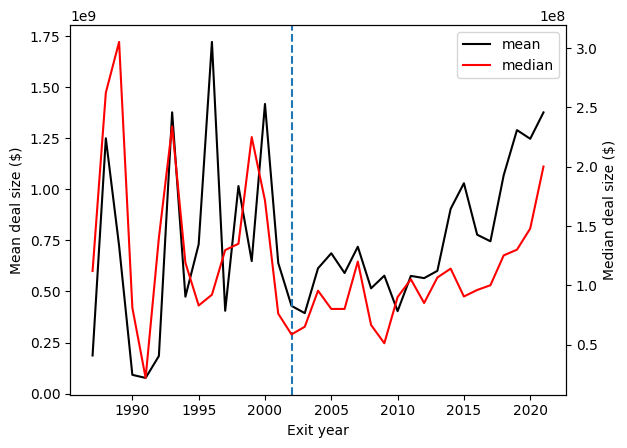

In [81]:
import matplotlib.pyplot as plt
plt.style.use('default')

df = exits.dropna().copy()
df.exit_date = pd.to_datetime(df.exit_date, errors='coerce')
df = df[(df.exit_date.dt.year > 1986) & (df.exit_date.dt.year < 2022)]


fig, ax1 = plt.subplots()

ax1.set_xlabel('Exit year')
ax1.set_ylabel('Mean deal size ($)')
p1 = ax1.plot(df.groupby(df.exit_date.dt.year).mean()['exit_value'], color='black', label='mean')
ax1.tick_params(axis='y')
ax1.axvline(2002, ls='--')

ax2 = ax1.twinx()
ax2.set_ylabel('Median deal size ($)')
p2 = ax2.plot(df.groupby(df.exit_date.dt.year).median()['exit_value'], color='red', label='median')


p = p1+p2
labs = [l.get_label() for l in p]
plt.legend(p, labs, loc=0)

plt.xlabel('Exit Year')
plt.savefig('figures/deal_size.pdf')